In [ ]:
##Loading data
import os
os.environ["PTB_FOLDER_PATH"] = "/home/jupyter/data/files/ptbdb/1.0.0/"
import sys
sys.path.insert(0,"/home/jupyter/Cappy/ptd_data_handler")
sys.path.insert(0,"/home/jupyter/Cappy/signal_processing")
from ptb_data_formatter import *
from feature_extraction import *
from custom_processing import *
#all_patient_data = get_formatted_ptb_data()
from ptb_xl_data_formatter import *
os.environ["PTB_XL_FOLDER_PATH"] = "/home/jupyter/data/physionet.org/files/ptb-xl/1.0.1"
all_patient_data = get_formatted_ptb_xl_data()

In [ ]:
np.random.seed(42)

In [ ]:
import pandas as pd

In [ ]:
# Create individual df for each class
mi_df = pd.DataFrame()
norm_df = pd.DataFrame()
non_mi_df = pd.DataFrame()

for recording in all_patient_data.keys():
    label = all_patient_data[recording]["diagnostic_class"][0]
    signal = all_patient_data[recording]["I"]
    
    # Clean Signal
    signal = clean_ecg_signal(signal, old_fs=500)
    signal = pd.DataFrame(signal)
    if label == "mi":
        mi_df[recording] = signal
    elif label == "norm":
        norm_df[recording] = signal
    elif label == "non_mi":
        non_mi_df[recording] = signal

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To 

In [ ]:
norm_df

,ecg_id_1,ecg_id_2,ecg_id_3,ecg_id_4,ecg_id_5,ecg_id_6,ecg_id_7,ecg_id_9,ecg_id_10,ecg_id_11,...,ecg_id_21814,ecg_id_21818,ecg_id_21822,ecg_id_21823,ecg_id_21825,ecg_id_21830,ecg_id_21831,ecg_id_21834,ecg_id_21836,ecg_id_21837
0,-0.009347,0.003970,-0.039000,-0.003108,-0.000459,-0.028732,-0.004423,-0.021314,-0.039865,0.029101,...,-0.023012,-0.001422,-0.003744,-0.021490,-0.016769,-0.006891,-0.002969,-0.007398,-0.006681,-0.004043
1,-0.012923,0.004130,-0.040540,-0.003672,-0.000078,-0.029169,-0.004455,-0.026685,-0.040053,0.031884,...,-0.023845,-0.001576,-0.003956,-0.022829,-0.012274,-0.011858,-0.003013,-0.009197,-0.008623,-0.004408
2,-0.015592,0.004313,-0.042083,-0.004065,0.000122,-0.029958,-0.004510,-0.030743,-0.040922,0.034173,...,-0.024496,-0.001693,-0.004136,-0.023896,-0.008044,-0.015739,-0.003054,-0.010527,-0.010028,-0.004711
3,-0.017107,0.004451,-0.043554,-0.004296,0.000013,-0.030994,-0.004599,-0.032745,-0.042824,0.035931,...,-0.024848,-0.001744,-0.004260,-0.024516,-0.004839,-0.017761,-0.003093,-0.010945,-0.010549,-0.004907
4,-0.017702,0.004352,-0.044784,-0.004461,-0.000443,-0.031639,-0.004724,-0.032476,-0.045653,0.037407,...,-0.024894,-0.001723,-0.004322,-0.024624,-0.004421,-0.017430,-0.003139,-0.010145,-0.010007,-0.004983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.005499,-0.000025,-0.005809,-0.003973,-0.000129,0.003427,-0.000903,0.001467,-0.001330,-0.004544,...,-0.000153,-0.003259,0.001467,-0.001109,-0.001520,0.000290,-0.005493,0.000944,0.004262,-0.007596
4596,0.004969,-0.000020,-0.005355,-0.003513,-0.000112,0.003118,-0.000827,0.001179,-0.001239,-0.004117,...,-0.000156,-0.002987,0.001340,-0.001026,-0.001357,0.000260,-0.005039,0.000856,0.003903,-0.006966
4597,0.004487,0.000015,-0.004830,-0.002628,-0.000100,0.002773,-0.000746,0.001030,-0.001149,-0.003660,...,-0.000158,-0.002663,0.001202,-0.000937,-0.001185,0.000295,-0.004574,0.000773,0.003509,-0.006244
4598,0.004102,0.000069,-0.004258,-0.001457,-0.000090,0.002404,-0.000664,0.001095,-0.001061,-0.003228,...,-0.000160,-0.002303,0.001057,-0.000844,-0.001008,0.000377,-0.004103,0.000695,0.003093,-0.005464


In [ ]:
mi_df

,ecg_id_77,ecg_id_106,ecg_id_131,ecg_id_139,ecg_id_152,ecg_id_162,ecg_id_177,ecg_id_181,ecg_id_184,ecg_id_189,...,ecg_id_21788,ecg_id_21793,ecg_id_21796,ecg_id_21799,ecg_id_21805,ecg_id_21811,ecg_id_21815,ecg_id_21826,ecg_id_21827,ecg_id_21828
0,-0.038216,-0.000989,-0.018618,-0.024321,-0.004008,0.004239,-0.007663,-0.032769,0.008102,0.020674,...,-0.003852,0.353304,0.013632,0.012455,0.000497,-0.019221,0.005553,0.011715,0.010180,-0.001342
1,-0.038924,-0.000582,-0.019282,-0.028041,-0.004006,0.004611,-0.009266,-0.032548,0.006741,0.021936,...,-0.003325,0.360804,0.014458,0.013331,0.000873,-0.020913,0.006690,0.011091,0.010963,-0.001450
2,-0.039715,-0.000276,-0.019885,-0.030967,-0.003715,0.004879,-0.010420,-0.032718,0.005921,0.022862,...,-0.003049,0.373210,0.015139,0.014043,0.001158,-0.022117,0.008079,0.010091,0.011743,-0.001540
3,-0.040454,-0.000139,-0.020368,-0.032966,-0.002968,0.004980,-0.010664,-0.033484,0.005843,0.023257,...,-0.003045,0.396816,0.015568,0.014469,0.001291,-0.022629,0.009693,0.008625,0.012379,-0.001597
4,-0.040977,-0.000192,-0.020707,-0.034439,-0.001936,0.004937,-0.009600,-0.034861,0.006418,0.023114,...,-0.003172,0.438201,0.015712,0.014571,0.001255,-0.022710,0.011035,0.007408,0.012609,-0.001618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.000371,-0.003030,-0.001336,-0.012455,0.003633,0.000759,-0.008535,-0.007130,-0.004652,0.002573,...,-0.020067,0.009014,-0.000256,0.002257,-0.003724,-0.008708,0.002847,0.001047,0.000090,0.001465
4596,-0.000364,-0.002777,-0.001236,-0.011647,0.003335,0.000700,-0.007842,-0.006564,-0.004190,0.002382,...,-0.018354,0.009014,-0.000223,0.002080,-0.003414,-0.007997,0.002616,0.000958,0.000097,0.001339
4597,-0.000373,-0.002482,-0.001112,-0.010651,0.003025,0.000636,-0.007124,-0.005976,-0.003465,0.002184,...,-0.016345,0.008317,-0.000192,0.001892,-0.003097,-0.007192,0.002389,0.000856,0.000102,0.001210
4598,-0.000401,-0.002162,-0.000973,-0.009366,0.002709,0.000570,-0.006392,-0.005377,-0.002566,0.001982,...,-0.014145,0.006642,-0.000162,0.001700,-0.002778,-0.006327,0.002166,0.000748,0.000105,0.001079


In [ ]:
non_mi_df

,ecg_id_17,ecg_id_18,ecg_id_20,ecg_id_22,ecg_id_23,ecg_id_26,ecg_id_28,ecg_id_30,ecg_id_32,ecg_id_34,...,ecg_id_21806,ecg_id_21812,ecg_id_21816,ecg_id_21817,ecg_id_21819,ecg_id_21821,ecg_id_21829,ecg_id_21832,ecg_id_21833,ecg_id_21835
0,-0.020789,-0.044607,-0.001175,-0.025060,-0.037304,-0.005681,-0.014863,-0.005984,-0.007912,0.072998,...,-0.004031,0.003311,-0.002510,-0.016424,-0.010705,-0.006108,-0.041105,-0.005660,-0.038642,-0.017364
1,-0.022534,-0.045078,-0.001420,-0.023951,-0.040538,-0.006658,-0.010334,-0.006977,-0.007887,0.123542,...,-0.007671,0.002737,-0.001892,-0.017545,-0.012709,-0.006089,-0.040612,-0.006637,-0.038123,-0.012750
2,-0.024929,-0.045824,-0.001521,-0.023457,-0.042989,-0.006916,-0.007233,-0.007651,-0.008007,0.162820,...,-0.010359,0.002675,-0.001150,-0.018455,-0.014036,-0.006124,-0.040717,-0.007312,-0.039146,-0.008225
3,-0.027371,-0.046922,-0.001447,-0.023816,-0.043179,-0.006485,-0.006705,-0.007965,-0.008363,0.178342,...,-0.012087,0.003402,-0.000393,-0.018975,-0.014084,-0.006251,-0.041912,-0.007466,-0.042718,-0.004455
4,-0.027478,-0.048258,-0.001239,-0.024972,-0.039306,-0.006149,-0.009506,-0.008052,-0.008969,0.156886,...,-0.013407,0.004868,-0.000180,-0.019009,-0.012525,-0.006498,-0.044389,-0.007023,-0.048779,-0.003396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.002525,-0.008924,0.000351,0.001532,-0.008504,0.002741,-0.021608,-0.004067,-0.000269,0.010352,...,0.030718,0.000541,0.000917,-0.000884,-0.005866,-0.005420,-0.007793,0.005081,-0.008164,-0.001286
4596,-0.002484,-0.008285,0.000323,0.001453,-0.007954,0.002487,-0.019854,-0.003760,-0.000252,0.010404,...,0.027790,0.000493,0.000846,-0.000823,-0.005401,-0.004976,-0.007036,0.004661,-0.007511,-0.001148
4597,-0.002678,-0.007712,0.000286,0.001300,-0.007574,0.002239,-0.018068,-0.003398,-0.000239,0.009925,...,0.024824,0.000436,0.000770,-0.000770,-0.004908,-0.004456,-0.005838,0.004222,-0.006819,-0.000982
4598,-0.003031,-0.007187,0.000244,0.001050,-0.007306,0.002020,-0.016270,-0.002979,-0.000228,0.008690,...,0.022140,0.000374,0.000692,-0.000722,-0.004397,-0.003888,-0.004348,0.003774,-0.006108,-0.000797


In [ ]:
# Delete any column in which any reading is NaN
norm_df = norm_df.dropna(axis=1)
mi_df = mi_df.dropna(axis=1)
non_mi_df = non_mi_df.dropna(axis=1)

In [ ]:
norm_df

,ecg_id_1,ecg_id_2,ecg_id_3,ecg_id_4,ecg_id_5,ecg_id_6,ecg_id_7,ecg_id_9,ecg_id_10,ecg_id_11,...,ecg_id_21814,ecg_id_21818,ecg_id_21822,ecg_id_21823,ecg_id_21825,ecg_id_21830,ecg_id_21831,ecg_id_21834,ecg_id_21836,ecg_id_21837
0,-0.009347,0.003970,-0.039000,-0.003108,-0.000459,-0.028732,-0.004423,-0.021314,-0.039865,0.029101,...,-0.023012,-0.001422,-0.003744,-0.021490,-0.016769,-0.006891,-0.002969,-0.007398,-0.006681,-0.004043
1,-0.012923,0.004130,-0.040540,-0.003672,-0.000078,-0.029169,-0.004455,-0.026685,-0.040053,0.031884,...,-0.023845,-0.001576,-0.003956,-0.022829,-0.012274,-0.011858,-0.003013,-0.009197,-0.008623,-0.004408
2,-0.015592,0.004313,-0.042083,-0.004065,0.000122,-0.029958,-0.004510,-0.030743,-0.040922,0.034173,...,-0.024496,-0.001693,-0.004136,-0.023896,-0.008044,-0.015739,-0.003054,-0.010527,-0.010028,-0.004711
3,-0.017107,0.004451,-0.043554,-0.004296,0.000013,-0.030994,-0.004599,-0.032745,-0.042824,0.035931,...,-0.024848,-0.001744,-0.004260,-0.024516,-0.004839,-0.017761,-0.003093,-0.010945,-0.010549,-0.004907
4,-0.017702,0.004352,-0.044784,-0.004461,-0.000443,-0.031639,-0.004724,-0.032476,-0.045653,0.037407,...,-0.024894,-0.001723,-0.004322,-0.024624,-0.004421,-0.017430,-0.003139,-0.010145,-0.010007,-0.004983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.005499,-0.000025,-0.005809,-0.003973,-0.000129,0.003427,-0.000903,0.001467,-0.001330,-0.004544,...,-0.000153,-0.003259,0.001467,-0.001109,-0.001520,0.000290,-0.005493,0.000944,0.004262,-0.007596
4596,0.004969,-0.000020,-0.005355,-0.003513,-0.000112,0.003118,-0.000827,0.001179,-0.001239,-0.004117,...,-0.000156,-0.002987,0.001340,-0.001026,-0.001357,0.000260,-0.005039,0.000856,0.003903,-0.006966
4597,0.004487,0.000015,-0.004830,-0.002628,-0.000100,0.002773,-0.000746,0.001030,-0.001149,-0.003660,...,-0.000158,-0.002663,0.001202,-0.000937,-0.001185,0.000295,-0.004574,0.000773,0.003509,-0.006244
4598,0.004102,0.000069,-0.004258,-0.001457,-0.000090,0.002404,-0.000664,0.001095,-0.001061,-0.003228,...,-0.000160,-0.002303,0.001057,-0.000844,-0.001008,0.000377,-0.004103,0.000695,0.003093,-0.005464


In [ ]:
mi_df

,ecg_id_77,ecg_id_106,ecg_id_131,ecg_id_139,ecg_id_152,ecg_id_162,ecg_id_177,ecg_id_181,ecg_id_184,ecg_id_189,...,ecg_id_21788,ecg_id_21793,ecg_id_21796,ecg_id_21799,ecg_id_21805,ecg_id_21811,ecg_id_21815,ecg_id_21826,ecg_id_21827,ecg_id_21828
0,-0.038216,-0.000989,-0.018618,-0.024321,-0.004008,0.004239,-0.007663,-0.032769,0.008102,0.020674,...,-0.003852,0.353304,0.013632,0.012455,0.000497,-0.019221,0.005553,0.011715,0.010180,-0.001342
1,-0.038924,-0.000582,-0.019282,-0.028041,-0.004006,0.004611,-0.009266,-0.032548,0.006741,0.021936,...,-0.003325,0.360804,0.014458,0.013331,0.000873,-0.020913,0.006690,0.011091,0.010963,-0.001450
2,-0.039715,-0.000276,-0.019885,-0.030967,-0.003715,0.004879,-0.010420,-0.032718,0.005921,0.022862,...,-0.003049,0.373210,0.015139,0.014043,0.001158,-0.022117,0.008079,0.010091,0.011743,-0.001540
3,-0.040454,-0.000139,-0.020368,-0.032966,-0.002968,0.004980,-0.010664,-0.033484,0.005843,0.023257,...,-0.003045,0.396816,0.015568,0.014469,0.001291,-0.022629,0.009693,0.008625,0.012379,-0.001597
4,-0.040977,-0.000192,-0.020707,-0.034439,-0.001936,0.004937,-0.009600,-0.034861,0.006418,0.023114,...,-0.003172,0.438201,0.015712,0.014571,0.001255,-0.022710,0.011035,0.007408,0.012609,-0.001618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.000371,-0.003030,-0.001336,-0.012455,0.003633,0.000759,-0.008535,-0.007130,-0.004652,0.002573,...,-0.020067,0.009014,-0.000256,0.002257,-0.003724,-0.008708,0.002847,0.001047,0.000090,0.001465
4596,-0.000364,-0.002777,-0.001236,-0.011647,0.003335,0.000700,-0.007842,-0.006564,-0.004190,0.002382,...,-0.018354,0.009014,-0.000223,0.002080,-0.003414,-0.007997,0.002616,0.000958,0.000097,0.001339
4597,-0.000373,-0.002482,-0.001112,-0.010651,0.003025,0.000636,-0.007124,-0.005976,-0.003465,0.002184,...,-0.016345,0.008317,-0.000192,0.001892,-0.003097,-0.007192,0.002389,0.000856,0.000102,0.001210
4598,-0.000401,-0.002162,-0.000973,-0.009366,0.002709,0.000570,-0.006392,-0.005377,-0.002566,0.001982,...,-0.014145,0.006642,-0.000162,0.001700,-0.002778,-0.006327,0.002166,0.000748,0.000105,0.001079


In [ ]:
non_mi_df

,ecg_id_17,ecg_id_18,ecg_id_20,ecg_id_22,ecg_id_23,ecg_id_26,ecg_id_28,ecg_id_30,ecg_id_32,ecg_id_34,...,ecg_id_21806,ecg_id_21812,ecg_id_21816,ecg_id_21817,ecg_id_21819,ecg_id_21821,ecg_id_21829,ecg_id_21832,ecg_id_21833,ecg_id_21835
0,-0.020789,-0.044607,-0.001175,-0.025060,-0.037304,-0.005681,-0.014863,-0.005984,-0.007912,0.072998,...,-0.004031,0.003311,-0.002510,-0.016424,-0.010705,-0.006108,-0.041105,-0.005660,-0.038642,-0.017364
1,-0.022534,-0.045078,-0.001420,-0.023951,-0.040538,-0.006658,-0.010334,-0.006977,-0.007887,0.123542,...,-0.007671,0.002737,-0.001892,-0.017545,-0.012709,-0.006089,-0.040612,-0.006637,-0.038123,-0.012750
2,-0.024929,-0.045824,-0.001521,-0.023457,-0.042989,-0.006916,-0.007233,-0.007651,-0.008007,0.162820,...,-0.010359,0.002675,-0.001150,-0.018455,-0.014036,-0.006124,-0.040717,-0.007312,-0.039146,-0.008225
3,-0.027371,-0.046922,-0.001447,-0.023816,-0.043179,-0.006485,-0.006705,-0.007965,-0.008363,0.178342,...,-0.012087,0.003402,-0.000393,-0.018975,-0.014084,-0.006251,-0.041912,-0.007466,-0.042718,-0.004455
4,-0.027478,-0.048258,-0.001239,-0.024972,-0.039306,-0.006149,-0.009506,-0.008052,-0.008969,0.156886,...,-0.013407,0.004868,-0.000180,-0.019009,-0.012525,-0.006498,-0.044389,-0.007023,-0.048779,-0.003396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.002525,-0.008924,0.000351,0.001532,-0.008504,0.002741,-0.021608,-0.004067,-0.000269,0.010352,...,0.030718,0.000541,0.000917,-0.000884,-0.005866,-0.005420,-0.007793,0.005081,-0.008164,-0.001286
4596,-0.002484,-0.008285,0.000323,0.001453,-0.007954,0.002487,-0.019854,-0.003760,-0.000252,0.010404,...,0.027790,0.000493,0.000846,-0.000823,-0.005401,-0.004976,-0.007036,0.004661,-0.007511,-0.001148
4597,-0.002678,-0.007712,0.000286,0.001300,-0.007574,0.002239,-0.018068,-0.003398,-0.000239,0.009925,...,0.024824,0.000436,0.000770,-0.000770,-0.004908,-0.004456,-0.005838,0.004222,-0.006819,-0.000982
4598,-0.003031,-0.007187,0.000244,0.001050,-0.007306,0.002020,-0.016270,-0.002979,-0.000228,0.008690,...,0.022140,0.000374,0.000692,-0.000722,-0.004397,-0.003888,-0.004348,0.003774,-0.006108,-0.000797


In [ ]:
# Shuffle the order of the ecg recordings
import random
norm_cols = norm_df.columns.to_list()
random.shuffle(norm_cols)
mi_cols = mi_df.columns.to_list()
random.shuffle(mi_cols)
non_mi_cols = non_mi_df.columns.to_list()
random.shuffle(non_mi_cols)
norm_df = norm_df[norm_cols]
mi_df = mi_df[mi_cols]
non_mi_df = non_mi_df[non_mi_cols]

In [ ]:
print("Number of norm cases: ")
print(len(norm_df.columns))
print("Number of MI cases: ")
print(len(mi_df.columns))
print("Number of non_MI cases: ")
print(len(non_mi_df.columns))

Number of norm cases: 
8938
Number of MI cases: 
4145
Number of non_MI cases: 
7815


In [ ]:
beat_len = 512

mi_beats = []
for ecg in mi_df.columns:
    _mi_beats = []
    sig = mi_df[ecg].to_numpy()
    peaks = apply_pan_tompkins(sig, n_beats=8, standardize=True)
    for peak in peaks.keys():
        p = peaks[peak]
        _mi_beats.append(p)
        
    _mi_beats = np.array(_mi_beats)
    
    if np.shape(_mi_beats)[0] == 8:
        # Shuffle sequence of beats
        df = pd.DataFrame(np.reshape(_mi_beats, [8,beat_len]))
        df = df.sample(frac=1).reset_index(drop=True)
        _mi_beats = df.to_numpy()
        _mi_beats = np.reshape(_mi_beats, [8,beat_len,1])
        mi_beats.append(_mi_beats)

norm_beats = []
for ecg in norm_df.columns:
    _norm_beats = []
    sig = norm_df[ecg].to_numpy()
    peaks = apply_pan_tompkins(sig, n_beats=8, standardize=True)
    for peak in peaks.keys():
        p = peaks[peak]
        _norm_beats.append(p)
    
    _norm_beats = np.array(_norm_beats)
    
    if np.shape(_norm_beats)[0] == 8:
        # Shuffle sequence of beats
        df = pd.DataFrame(np.reshape(_norm_beats, [8,beat_len]))
        df = df.sample(frac=1).reset_index(drop=True)
        _norm_beats = df.to_numpy()
        _norm_beats = np.reshape(_norm_beats, [8,beat_len,1])
        norm_beats.append(_norm_beats)
        
non_mi_beats = []
for ecg in non_mi_df.columns:
    _non_mi_beats = []
    sig = non_mi_df[ecg].to_numpy()
    peaks = apply_pan_tompkins(sig, n_beats=8, standardize=True)
    for peak in peaks.keys():
        p = peaks[peak]
        _non_mi_beats.append(p)
   
    _non_mi_beats = np.array(_non_mi_beats)
    
    if np.shape(_non_mi_beats)[0] == 8:
        # Shuffle sequence of beats
        df = pd.DataFrame(np.reshape(_non_mi_beats, [8,beat_len]))
        df = df.sample(frac=1).reset_index(drop=True)
        _non_mi_beats = df.to_numpy()
        _non_mi_beats = np.reshape(_non_mi_beats, [8,beat_len,1])
        non_mi_beats.append(_non_mi_beats)
    
print(np.shape(mi_beats))
print(np.shape(norm_beats))
print(np.shape(non_mi_beats))

(4069, 8, 512, 1)
(8660, 8, 512, 1)
(7661, 8, 512, 1)


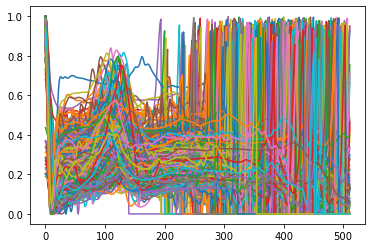

In [15]:
# import matplotlib.pyplot as plt
# for i in range(1000):
#     plt.plot(norm_beats[i][1])
#plt.plot(mi_beats[2000][1])
# plt.plot(mi_beats[2001][1])
# plt.plot(mi_beats[2002][1])
# plt.plot(mi_beats[2003][1])
# plt.plot(mi_beats[2004][1])
# plt.plot(mi_beats[2005][1])
# plt.plot(mi_beats[2006][1])
# plt.plot(mi_beats[2007][1])
# plt.plot(mi_beats[2008][1])
# plt.plot(mi_beats[2009][1])
# plt.plot(mi_beats[2010][1])
# plt.plot(mi_beats[2011][1])
# plt.plot(mi_beats[2012][1])
# plt.plot(mi_beats[2013][1])
# plt.plot(mi_beats[2014][1])
# plt.plot(mi_beats[2015][1])
# plt.plot(mi_beats[2016][1])
# plt.plot(mi_beats[2017][1])
# plt.plot(mi_beats[2018][1])
# plt.plot(mi_beats[2019][1])
plt.show()
#mi_beats[1][7]

In [ ]:
# We are going to make three training and testing sets for each of the models.
# We will then use these datasets to train each of the individual one-vs-one classifiers
# For each of these datasets, we want a balanced of classes, such that a good classifier can be made.
# After, we will then make a 4th dataset to train the meta classifier, without updating the weights of the individual ovo models

from sklearn.utils import shuffle

# Dataset for model 1: MI vs non-MI model

# Separate into train and test set with balanced class labels
model_1_data_train = np.concatenate((mi_beats[0:int(0.8*len(mi_beats))], non_mi_beats[0:int(0.8*len(mi_beats))]))
model_1_data_test = np.concatenate((mi_beats[int(0.8*len(mi_beats)):], non_mi_beats[int(0.8*len(mi_beats)):len(mi_beats)]))

# Class labels: MI - 1, non-MI - 0
mi_label_model_1 = np.ones((4069,1,1))
non_mi_label_model_1 = np.zeros((4069,1,1))

model_1_labels_train = np.concatenate((mi_label_model_1[0:int(0.8*len(mi_beats))], non_mi_label_model_1[0:int(0.8*len(mi_beats))]))
model_1_labels_test = np.concatenate((mi_label_model_1[int(0.8*len(mi_beats)):], non_mi_label_model_1[int(0.8*len(mi_beats)):len(mi_beats)]))

# Shuffle across the first index using the same logic for both the label and the data
model_1_data_train, model_1_labels_train = shuffle(model_1_data_train, model_1_labels_train)
model_1_data_test, model_1_labels_test = shuffle(model_1_data_test, model_1_labels_test)

print(np.shape(model_1_data_train))
print(np.shape(model_1_labels_train))

print(np.shape(model_1_data_test))
print(np.shape(model_1_labels_test))

(6510, 8, 512, 1)
(6510, 1, 1)
(1628, 8, 512, 1)
(1628, 1, 1)


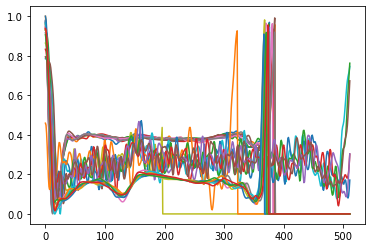

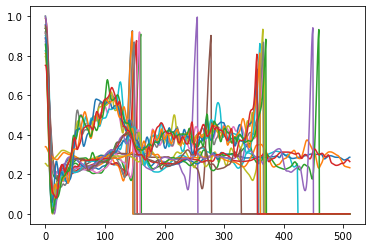

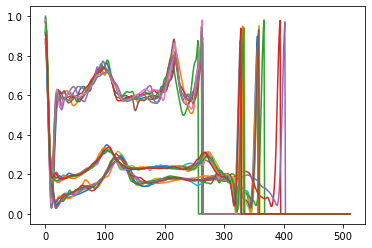

In [ ]:
for i in range(3):
    plt.plot(mi_beats[i][0])
    plt.plot(mi_beats[i][1])
    plt.plot(mi_beats[i][2])
    plt.plot(mi_beats[i][3])
    plt.plot(mi_beats[i][4])
    plt.plot(mi_beats[i][5])
    plt.plot(mi_beats[i][6])
    plt.plot(mi_beats[i][7])
plt.show()

for i in range(3):
    plt.plot(non_mi_beats[i][0])
    plt.plot(non_mi_beats[i][1])
    plt.plot(non_mi_beats[i][2])
    plt.plot(non_mi_beats[i][3])
    plt.plot(non_mi_beats[i][4])
    plt.plot(non_mi_beats[i][5])
    plt.plot(non_mi_beats[i][6])
    plt.plot(non_mi_beats[i][7])
plt.show()

for i in range(3):
    plt.plot(norm_beats[i][0])
    plt.plot(norm_beats[i][1])
    plt.plot(norm_beats[i][2])
    plt.plot(norm_beats[i][3])
    plt.plot(norm_beats[i][4])
    plt.plot(norm_beats[i][5])
    plt.plot(norm_beats[i][6])
    plt.plot(norm_beats[i][7])
plt.show()

In [ ]:
# Dataset for model 2: MI vs norm model

# Separate into training and testing set
model_2_data_train = np.concatenate((mi_beats[0:int(0.8*len(mi_beats))], norm_beats[0:int(0.8*len(mi_beats))]))
model_2_data_test = np.concatenate((mi_beats[int(0.8*len(mi_beats)):], norm_beats[int(0.8*len(mi_beats)):len(mi_beats)]))

# Class labels: MI - 1, norm - 0
mi_label_model_2 = np.ones((4069,1,1))
norm_label_model_2 = np.zeros((4069,1,1))

model_2_labels_train = np.concatenate((mi_label_model_2[0:int(0.8*len(mi_beats))], norm_label_model_2[0:int(0.8*len(mi_beats))]))
model_2_labels_test = np.concatenate((mi_label_model_2[int(0.8*len(mi_beats)):], norm_label_model_2[int(0.8*len(mi_beats)):len(mi_beats)]))

# Shuffle across the first index using the same logic for both the label and the data
model_2_data_train, model_2_labels_train = shuffle(model_2_data_train, model_2_labels_train)
model_2_data_test, model_2_labels_test = shuffle(model_2_data_test, model_2_labels_test)

print(np.shape(model_2_data_train))
print(np.shape(model_2_labels_train))

print(np.shape(model_2_data_test))
print(np.shape(model_2_labels_test))

(6510, 8, 512, 1)
(6510, 1, 1)
(1628, 8, 512, 1)
(1628, 1, 1)


In [ ]:
# Dataset for model 3: non-MI vs norm model

# Separate into training and testing set
model_3_data_train = np.concatenate((non_mi_beats[0:int(0.8*len(non_mi_beats))], norm_beats[0:int(0.8*len(non_mi_beats))]))
model_3_data_test = np.concatenate((non_mi_beats[int(0.8*len(non_mi_beats)):], norm_beats[int(0.8*len(non_mi_beats)):len(non_mi_beats)]))

# Class labels: non-MI - 0, norm - 1
non_mi_label_model_3 = np.zeros((7661,1,1))
norm_label_model_3 = np.ones((7661,1,1))

model_3_labels_train = np.concatenate((non_mi_label_model_3[0:int(0.8*len(non_mi_beats))], norm_label_model_3[0:int(0.8*len(non_mi_beats))]))
model_3_labels_test = np.concatenate((non_mi_label_model_3[int(0.8*len(non_mi_beats)):], norm_label_model_3[int(0.8*len(non_mi_beats)):len(non_mi_beats)]))

# Shuffle across the first index using the same logic for both the label and the data
model_3_data_train, model_3_labels_train = shuffle(model_3_data_train, model_3_labels_train)
model_3_data_test, model_3_labels_test = shuffle(model_3_data_test, model_3_labels_test)

print(np.shape(model_3_data_train))
print(np.shape(model_3_labels_train))

print(np.shape(model_3_data_test))
print(np.shape(model_3_labels_test))

(12256, 8, 512, 1)
(12256, 1, 1)
(3066, 8, 512, 1)
(3066, 1, 1)


In [ ]:
# Dataset for model 4: meta learner - whole dataset

# Separate into train and test set with balanced class labels
model_4_data_train = np.concatenate((mi_beats[0:int(0.8*len(mi_beats))], non_mi_beats[0:int(0.8*len(mi_beats))], norm_beats[0:int(0.8*len(mi_beats))]))
model_4_data_test = np.concatenate((mi_beats[int(0.8*len(mi_beats)):], non_mi_beats[int(0.8*len(mi_beats)):len(mi_beats)], norm_beats[int(0.8*len(mi_beats)):len(mi_beats)]))

# Class labels: MI - [1,0,0], non-MI - [0,1,0], norm - [0,0,1]
mi_label_model_4 = np.zeros((4069,3))
non_mi_label_model_4 = np.zeros((4069,3))
norm_label_model_4 = np.zeros((4069,3))

for i in range(len(mi_label_model_4)):
    mi_label_model_4[i] = [1,0,0]
    non_mi_label_model_4[i] = [0,1,0]
    norm_label_model_4[i] = [0,0,1]

model_4_labels_train = np.concatenate((mi_label_model_4[0:int(0.8*len(mi_beats))], non_mi_label_model_4[0:int(0.8*len(mi_beats))], norm_label_model_4[0:int(0.8*len(mi_beats))]))
model_4_labels_test = np.concatenate((mi_label_model_4[int(0.8*len(mi_beats)):], non_mi_label_model_4[int(0.8*len(mi_beats)):len(mi_beats)], norm_label_model_4[int(0.8*len(mi_beats)):len(mi_beats)]))

# Shuffle across the first index using the same logic for both the label and the data
model_4_data_train, model_4_labels_train = shuffle(model_4_data_train, model_4_labels_train)
model_4_data_test, model_4_labels_test = shuffle(model_4_data_test, model_4_labels_test)

print(np.shape(model_4_data_train))
print(np.shape(model_4_labels_train))

print(np.shape(model_4_data_test))
print(np.shape(model_4_labels_test))

(9765, 8, 512, 1)
(9765, 3)
(2442, 8, 512, 1)
(2442, 3)


In [ ]:
model_4_labels_test[1]

array([0., 1., 0.])

Model 1

In [56]:
import tensorflow as tf

seq_length = 8
beat_length = beat_len
num_feats = 1

## Layer 0 - input
input = tf.keras.Input(shape=(seq_length, beat_length, num_feats))

## Layers 1-6 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 7-12 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 13-19 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 19-24 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 25 - time-distributed flatten
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(x)

## Layer 26 - time-distributed dense
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu'))(x)

## Layer 27 - time-distributed batch norm
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)

## Layer 28 - time-distributed dropout
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 29 - LSTM
x = tf.keras.layers.LSTM(32)(x)

## Layer 30 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 31 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 32 - dense
x = tf.keras.layers.Dense(16, activation='relu')(x)

## Layer 33 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 34 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 35 - output
output = tf.keras.layers.Dense(1, activation='softmax')(x)

cnn_lstm_model_1 = tf.keras.Model(input, output, name="cnn_lstm_model_1")
cnn_lstm_model_1.summary()

Model: "cnn_lstm_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 8, 512, 1)]       0         
                                                                 
 time_distributed_113 (TimeD  (None, 8, 512, 32)       128       
 istributed)                                                     
                                                                 
 time_distributed_114 (TimeD  (None, 8, 512, 32)       128       
 istributed)                                                     
                                                                 
 time_distributed_115 (TimeD  (None, 8, 512, 32)       3104      
 istributed)                                                     
                                                                 
 time_distributed_116 (TimeD  (None, 8, 512, 32)       128       
 istributed)                                      

In [57]:
cnn_lstm_model_1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])

In [58]:
# Training
cnn_lstm_model_1.fit(x=model_1_data_train, y=model_1_labels_train, validation_data=[model_1_data_test, model_1_labels_test], batch_size=32, epochs=1, verbose=True)

204/204 [==============================] - 85s 383ms/step - loss: 0.9598 - binary_accuracy: 0.5000 - val_loss: 0.6973 - val_binary_accuracy: 0.5000


Model 2

In [25]:
seq_length = 8
beat_length = 345
num_feats = 1

## Layer 0 - input
input = tf.keras.Input(shape=(seq_length, beat_length, num_feats))

## Layers 1-6 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 7-12 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 13-19 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 19-24 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 25 - time-distributed flatten
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(x)

## Layer 26 - time-distributed dense
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu'))(x)

## Layer 27 - time-distributed batch norm
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)

## Layer 28 - time-distributed dropout
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 29 - LSTM
x = tf.keras.layers.LSTM(32)(x)

## Layer 30 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 31 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 32 - dense
x = tf.keras.layers.Dense(16, activation='relu')(x)

## Layer 33 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 34 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 35 - output
output = tf.keras.layers.Dense(1, activation='softmax')(x)

cnn_lstm_model_2 = tf.keras.Model(input, output, name="cnn_lstm_model_2")
cnn_lstm_model_2.summary()

Model: "cnn_lstm_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 8, 345, 1)]       0         
                                                                 
 time_distributed_84 (TimeDi  (None, 8, 345, 32)       128       
 stributed)                                                      
                                                                 
 time_distributed_85 (TimeDi  (None, 8, 345, 32)       128       
 stributed)                                                      
                                                                 
 time_distributed_86 (TimeDi  (None, 8, 345, 32)       3104      
 stributed)                                                      
                                                                 
 time_distributed_87 (TimeDi  (None, 8, 345, 32)       128       
 stributed)                                       

In [26]:
cnn_lstm_model_2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])

In [27]:
cnn_lstm_model_2.fit(x=model_2_data_train, y=model_2_labels_train, validation_data=[model_2_data_test, model_2_labels_test], batch_size=32, epochs=2, verbose=True)

Epoch 1/2
184/184 [==============================] - 58s 273ms/step - loss: 0.5854 - binary_accuracy: 0.5000 - val_loss: 0.7433 - val_binary_accuracy: 0.5000
Epoch 2/2
184/184 [==============================] - 48s 262ms/step - loss: 0.4632 - binary_accuracy: 0.5000 - val_loss: 0.6859 - val_binary_accuracy: 0.5000


In [30]:
seq_length = 8
beat_length = 345
num_feats = 1

## Layer 0 - input
input = tf.keras.Input(shape=(seq_length, beat_length, num_feats))

## Layers 1-6 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 7-12 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 13-19 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 19-24 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 25 - time-distributed flatten
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(x)

## Layer 26 - time-distributed dense
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu'))(x)

## Layer 27 - time-distributed batch norm
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)

## Layer 28 - time-distributed dropout
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 29 - LSTM
x = tf.keras.layers.LSTM(32)(x)

## Layer 30 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 31 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 32 - dense
x = tf.keras.layers.Dense(16, activation='relu')(x)

## Layer 33 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 34 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 35 - output
output = tf.keras.layers.Dense(1, activation='softmax')(x)

cnn_lstm_model_3 = tf.keras.Model(input, output, name="cnn_lstm_model_3")
cnn_lstm_model_3.summary()

Model: "cnn_lstm_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 8, 345, 1)]       0         
                                                                 
 time_distributed_140 (TimeD  (None, 8, 345, 32)       128       
 istributed)                                                     
                                                                 
 time_distributed_141 (TimeD  (None, 8, 345, 32)       128       
 istributed)                                                     
                                                                 
 time_distributed_142 (TimeD  (None, 8, 345, 32)       3104      
 istributed)                                                     
                                                                 
 time_distributed_143 (TimeD  (None, 8, 345, 32)       128       
 istributed)                                      

In [32]:
cnn_lstm_model_3.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])

In [33]:
cnn_lstm_model_3.fit(x=model_3_data_train, y=model_3_labels_train, validation_data=[model_3_data_test, model_3_labels_test], batch_size=32, epochs=2, verbose=True)

Epoch 1/2
353/353 [==============================] - 98s 258ms/step - loss: 0.5851 - binary_accuracy: 0.5000 - val_loss: 0.5710 - val_binary_accuracy: 0.5000
Epoch 2/2
353/353 [==============================] - 91s 257ms/step - loss: 0.4927 - binary_accuracy: 0.5000 - val_loss: 0.4787 - val_binary_accuracy: 0.5000


In [26]:
import tensorflow as tf

seq_length = 8
beat_length = 512
num_feats = 1

## Layer 0 - input
input = tf.keras.Input(shape=(seq_length, beat_length, num_feats))

## Layers 1-6 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(input)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 7-12 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 13-19 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layers 19-24 - time-distributed convolutional block
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu'))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPool1D(pool_size=2))(x)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 25 - time-distributed flatten
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten())(x)

## Layer 26 - time-distributed dense
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(32, activation='relu'))(x)

## Layer 27 - time-distributed batch norm
x = tf.keras.layers.TimeDistributed(tf.keras.layers.BatchNormalization())(x)

## Layer 28 - time-distributed dropout
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.5))(x)

## Layer 29 - LSTM
x = tf.keras.layers.LSTM(32)(x)

## Layer 30 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 31 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 32 - dense
x = tf.keras.layers.Dense(32, activation='relu')(x)

## Layer 33 - batch norm
x = tf.keras.layers.BatchNormalization()(x)

## Layer 34 - dropout
x = tf.keras.layers.Dropout(0.5)(x)

## Layer 35 - output
output = tf.keras.layers.Dense(3, activation='softmax')(x)

cnn_lstm_model_all = tf.keras.Model(input, output, name="cnn_lstm_model_all")
cnn_lstm_model_all.summary()

Model: "cnn_lstm_model_all"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8, 512, 1)]       0         
                                                                 
 time_distributed_16 (TimeDi  (None, 8, 512, 32)       128       
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 8, 512, 32)       128       
 stributed)                                                      
                                                                 
 time_distributed_18 (TimeDi  (None, 8, 512, 32)       3104      
 stributed)                                                      
                                                                 
 time_distributed_19 (TimeDi  (None, 8, 512, 32)       128       
 stributed)                                     

In [27]:
cnn_lstm_model_all.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])



In [28]:
import datetime

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [29]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [30]:
cnn_lstm_model_all.fit(x=model_4_data_train, y=model_4_labels_train, validation_data=[model_4_data_test, model_4_labels_test], batch_size=32, epochs=50, verbose=True, callbacks=[callback, tensorboard_callback])



Epoch 1/50
306/306 [==============================] - 117s 358ms/step - loss: 1.3821 - categorical_accuracy: 0.3575 - val_loss: 1.1476 - val_categorical_accuracy: 0.3333
Epoch 2/50
306/306 [==============================] - 111s 362ms/step - loss: 1.1058 - categorical_accuracy: 0.4022 - val_loss: 1.0854 - val_categorical_accuracy: 0.4087
Epoch 3/50
306/306 [==============================] - 110s 358ms/step - loss: 0.9975 - categorical_accuracy: 0.4869 - val_loss: 1.1303 - val_categorical_accuracy: 0.3923
Epoch 4/50
306/306 [==============================] - 111s 364ms/step - loss: 0.9582 - categorical_accuracy: 0.5145 - val_loss: 1.0157 - val_categorical_accuracy: 0.4459
Epoch 5/50
306/306 [==============================] - 110s 360ms/step - loss: 0.9348 - categorical_accuracy: 0.5241 - val_loss: 1.0197 - val_categorical_accuracy: 0.4623
Epoch 6/50
306/306 [==============================] - 111s 364ms/step - loss: 0.9287 - categorical_accuracy: 0.5308 - val_loss: 1.0237 - val_categoric